# Project 2: Titanic Dataset Analysis

                                 
                                                                                                
$$Submitted By : Rahul  Saxena$$
                       
### VARIABLE DESCRIPTIONS:
                       
                       
The dataset of study contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. The variables included are:

        survival        Survival
                        (0 = No; 1 = Yes)
        pclass          Passenger Class
                        (1 = 1st; 2 = 2nd; 3 = 3rd)
        name            Name
        sex             Sex
        age             Age
        sibsp           Number of Siblings/Spouses Aboard
        parch           Number of Parents/Children Aboard
        ticket          Ticket Number
        fare            Passenger Fare
        cabin           Cabin
        embarked        Port of Embarkation
                        (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

---------------------------------------------------------------------------------------------------


## Data Analysis :


### Questions :

In this analysis we will try to answer some questions related to Survival rate according to :
    1. Fare category  
    2. A person being Male or Female
    3. Age of the person i.e, Child , Adult , Senior Citizen
    4. Male Child or Female Child
    5. Socio-economic status Upper Class (1st), Middle Class(2nd) , Lower Class(3rd)
    6. Comparision of survival with respect to embarkment station
    7. Chances of survival of Man with child(Father) or spouse(Husband) or Single?
    8. Age-group of people with higher probablity of survival
    

### Investigating Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

titanic_data = pd.read_csv('titanic_data.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Wrangling
This dataset have some NaN values which will stop us doing proper analysis. In this phase we will detect those records and will clean our dataset. 

In [4]:
#Testing Presence of Null values in data set

total_null_values    = titanic_data.isnull().sum().sum()               #Total null values in titanic_dataset
null_values_survived = titanic_data.Survived.isnull().sum().sum()      #Total null values in Survived col titanic_dataset
null_values_pclass   = titanic_data.Pclass.isnull().sum().sum()        #Total null values in Pclass col titanic_dataset
null_values_name     = titanic_data.Name.isnull().sum().sum()          #Total null values in Name col titanic_dataset
null_values_sex      = titanic_data.Sex.isnull().sum().sum()           #Total null values in Sex col titanic_dataset
null_values_Age      = titanic_data.Age.isnull().sum().sum()           #Total null values in Age col titanic_dataset
null_values_SibSp    = titanic_data.SibSp.isnull().sum().sum()         #Total null values in SibSp col titanic_dataset
null_values_parch    = titanic_data.Parch.isnull().sum().sum()         #Total null values in Parch col titanic_dataset
null_values_ticket   = titanic_data.Ticket.isnull().sum().sum()        #Total null values in Ticket col titanic_dataset 
null_values_fare     = titanic_data.Fare.isnull().sum().sum()          #Total null values in Fare col titanic_dataset
null_values_cabin    = titanic_data.Cabin.isnull().sum().sum()         #Total null values in Cabin col titanic_dataset
null_values_embarked = titanic_data.Embarked.isnull().sum().sum()      #Total null values in Embarked col titanic_dataset

print 'Total null values in titanic_dataset : {}'.format(total_null_values)
print 'Total null values in Survived col titanic_dataset : {}'.format(null_values_survived)
print 'Total null values in Pclass col titanic_dataset : {}'.format(null_values_pclass)
print 'Total null values in Name col titanic_dataset : {}'.format(null_values_name)
print 'Total null values in Sex col titanic_dataset : {}'.format(null_values_sex)
print 'Total null values in Age col titanic_dataset : {}'.format(null_values_Age)
print 'Total null values in Sibsp col titanic_dataset : {}'.format(null_values_SibSp)
print 'Total null values in Parch col titanic_dataset : {}'.format(null_values_parch)
print 'Total null values in Ticket col titanic_dataset : {}'.format(null_values_ticket)
print 'Total null values in Cabin col titanic_dataset : {}'.format(null_values_cabin)
print 'Total null values in Embarked col titanic_dataset : {}'.format(null_values_embarked)

float(2)/891*100

Total null values in titanic_dataset : 866
Total null values in Survived col titanic_dataset : 0
Total null values in Pclass col titanic_dataset : 0
Total null values in Name col titanic_dataset : 0
Total null values in Sex col titanic_dataset : 0
Total null values in Age col titanic_dataset : 177
Total null values in Sibsp col titanic_dataset : 0
Total null values in Parch col titanic_dataset : 0
Total null values in Ticket col titanic_dataset : 0
Total null values in Cabin col titanic_dataset : 687
Total null values in Embarked col titanic_dataset : 2


0.22446689113355783

It means there are 3 columns with NaN values **Age(177) =19.8 % ** , **Cabin(687) = 77.1%** ,**Embarked(2)=0.22%** of 891 values
So, for analysis we can ignore *Embarked* for their NaN because it will not effect much. 
Let's consider the statistics of Age , Cabin column.

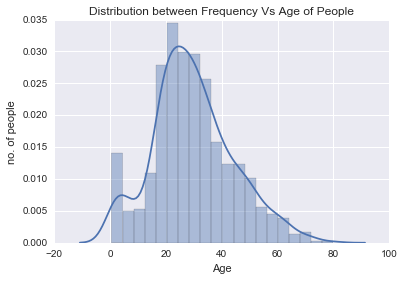

Mean of Age data with No NaNs = 29.6991176471


Number of distinct cabins are 147+
List of all distinct cabins :
"C78" "D17" "D50" "E77" "C30" "D56" "C32" "G6" "B50" "C62 C64" "D" "B102" "B101" "E68" "F33" "T" "F38" "A24" "E63" "E67" "B28" "B22" "B20" "B4" "B5" "B58 B60" "B3" "F G73" "C54" "C52" "C50" "C46" "F E69" "E58" "E50" "D28" "B38" "B39" "B35" "B37" "B30" "E121" "B71" "E8" "F G63" "C45" "E40" "C47" "E46" "E44" "B80" "E49" "C49" "B86" "B82 B84" "C23 C25 C27" "D48" "C104" "C106" "C101" "C103" "D15" "E34" "E33" "D11" "E31" "C70" "B94" "D19" "E38" "E36" "B18" "B19" "D37" "A32" "A31" "A36" "A34" "E101" "C118" "C2" "C7" "C111" "C110" "E24" "E25" "E12" "B57 B59 B63 B66" "C68" "D21" "D20" "C65" "D26" "E17" "A20" "F2" "A23" "F4" "A26" "B69" "B42" "C128" "C123" "C126" "C124" "C125" "B51 B53 B55" "D36" "E10" "D35" "D33" "D30" "B96 B98" "D10 D12" "C93" "A14" "C91" "B73" "A10" "C95" "B77" "B78" "B79" "C99" "A19" "C90" "A5" "A7" "A6" "C22 C26" "C92" "D49" "A16" "D47" "D46" "D45" "C82" "C83" "

In [5]:
Age_data = titanic_data['Age']
no_NaN_Age = [x for x in Age_data if str(x) != 'nan']
ax = sns.distplot(no_NaN_Age)
ax.set(xlabel='Age', ylabel='no. of people',title="Distribution between Frequency Vs Age of People")
sns.plt.show()
no_NaN_Age = np.array(no_NaN_Age)
print('Mean of Age data with No NaNs = {}').format(np.mean(no_NaN_Age))

Cabin_data = titanic_data['Cabin']
no_NaN_Cabin = [x for x in Cabin_data if str(x) != 'nan']
Cabin_set = set()
for x in no_NaN_Cabin:
    Cabin_set.add(x)
    
print '\n'
print('Number of distinct cabins are {}+').format(len(Cabin_set))
print 'List of all distinct cabins :'
for x in Cabin_set:
    print '"'+x+'"',
print '\n'

**Age data with No NaNs** is approximately normally distributed, so mean value will give better clarity about data's central tendancy. So, for analysis stuff we can clean the data by *replacing all NaNs with mean(29.699)* value of data.

**Cabin data** is having 147+ discrete string values,due to this we cann't calculate mean value for it. We cann't even use classification model to categorize data as there will be 147+ different categories on 891 samples.There are some values with "B51 B53 B55"which looks like including 3 cabin no.s . So, will ignore Cabin data for analysis. 

*** Let's clean Age data and make it NaN free and remove Cabin data from titanic_data dataframe.**


In [6]:
titanic_data.Age.fillna(np.mean(no_NaN_Age),inplace=True)
del titanic_data['Cabin']

---------------------------------------------------------------------------------------------------

### Q1. Analysis of Survival on the basis of Ship Fare & Sex Ratio

In [7]:
#No. of different fares in Titanic Ship
#Fare Variation

fare_list = titanic_data.Fare.unique()
fare_list = pd.DataFrame(fare_list)
#fare_list.describe()

no_survived = titanic_data['Survived'].value_counts()[1] #no of people survived

#print no_survived
no_died = len(titanic_data)  - no_survived  #no of people died
#print no_died
print('No of people Survived : {} , {:.2f}% of total'.format(no_survived, float(no_survived*100 )/len(titanic_data)))
print('No of people Died : {} , {:.2f}% of total'.format(no_died, float(no_died*100 )/len(titanic_data)))


No of people Survived : 342 , 38.38% of total
No of people Died : 549 , 61.62% of total


In [8]:
fare_list.sort_values([0],inplace =True)
fares = pd.DataFrame(titanic_data.Fare)
fares.sort_values(['Fare'],inplace =True)

top_90_fare = fares[800:801]['Fare']  #Top 10% fare
top_90_fare

102    77.2875
Name: Fare, dtype: float64

In [9]:
def isVIP(x):
    if x == 0:
        return "LowerClass" #Probably a Staff's relative/friend travelling with passes
    elif x >= 77.2875:
        return "VIP" # One of Top 10% guys travelling in Ship
    else:
        return "Gen" #Normal People travelling in Ship

titanic_data["Is_VIP"] = pd.Series(titanic_data["Fare"].apply(isVIP), index=titanic_data.index)


No. of General People with $0< fare < 77.28 : 784  , 87.99% of total
No. of General People Survived : 272 , 34.69%
No. of General People Died : 512, 65.31% 


No. of Lower Class People / Employees who were travelling for free : 15  , 1.68% of total
No. of Lower Class People/ Employees Survived : 1 , 6.67%
No. of Lower Class People/ Employees Died : 14, 93.33% 


No. of VIPs who were travelling : 92  , 10.33% of total
No. of VIPs Survived : 69 , 75.00%
No. of VIPs Died : 23, 25.00% 


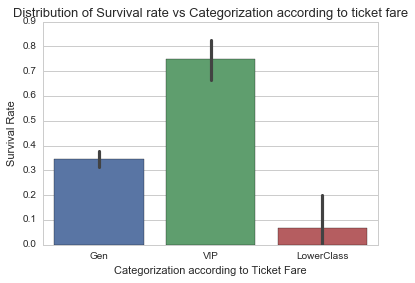

In [10]:
no_Gen = titanic_data['Is_VIP'].value_counts()['Gen']
no_Lower = titanic_data['Is_VIP'].value_counts()['LowerClass']
no_VIP = titanic_data['Is_VIP'].value_counts()['VIP']


no_Gen_survived =  titanic_data.groupby(['Is_VIP' , 'Survived']).size()['Gen'][1]
no_Gen_died = no_Gen - no_Gen_survived

no_Lower_survived =  titanic_data.groupby(['Is_VIP' , 'Survived']).size()['LowerClass'][1]
no_Lower_died = no_Lower - no_Lower_survived

no_VIP_survived =  titanic_data.groupby(['Is_VIP' , 'Survived']).size()['VIP'][1]
no_VIP_died = no_VIP - no_VIP_survived

print('No. of General People with $0< fare < 77.28 : {}  , {:.2f}% of total'.format(no_Gen, float(no_Gen*100 )/len(titanic_data)))
print('No. of General People Survived : {} , {:.2f}%'.format(no_Gen_survived , float(no_Gen_survived)*100/no_Gen))
print('No. of General People Died : {}, {:.2f}% '.format( no_Gen_died, float(no_Gen_died)*100/no_Gen))

print '\n'

print('No. of Lower Class People / Employees who were travelling for free : {}  , {:.2f}% of total'.format(no_Lower, float(no_Lower*100 )/len(titanic_data)))
print('No. of Lower Class People/ Employees Survived : {} , {:.2f}%'.format(no_Lower_survived , float(no_Lower_survived)*100/no_Lower))
print('No. of Lower Class People/ Employees Died : {}, {:.2f}% '.format( no_Lower_died, float(no_Lower_died)*100/no_Lower))

print '\n'

print('No. of VIPs who were travelling : {}  , {:.2f}% of total'.format(no_VIP, float(no_VIP*100 )/len(titanic_data)))
print('No. of VIPs Survived : {} , {:.2f}%'.format(no_VIP_survived , float(no_VIP_survived)*100/no_VIP))
print('No. of VIPs Died : {}, {:.2f}% '.format( no_VIP_died, float(no_VIP_died)*100/no_VIP))


sns.set_style("whitegrid")
sns.barplot(data = titanic_data , y = "Survived" , x ="Is_VIP")
plt.xlabel('Categorization according to Ticket Fare')
plt.ylabel('Survival Rate')
plt.title("Distribution of Survival rate vs Categorization according to ticket fare" , fontsize = 13)
sns.plt.show()

Populating the interactive namespace from numpy and matplotlib


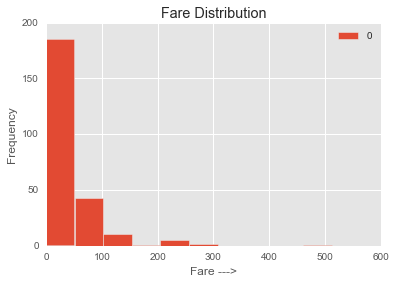

In [11]:
%pylab inline
#This graph shows the basic fare analysis 
import matplotlib
matplotlib.style.use('ggplot')
ax = fare_list.plot(kind="hist")
ax.set_xlabel("Fare --->")
ax.set_title("Fare Distribution")

The above analysis shows that if a person is travelling with *high price ticket* i.e, **VIPs** then their survival rate is much higher then **General & Lower Class / Employees**.

---------------------------------------------------------------------------------------------------

### Q2. Comparision of Survival for Male & Female ?

No. of Males : 577  , 64.76% of total
No. of Male Survived : 109 , 18.89%
No. of Male Died : 468, 81.11% 


No. of Females : 314  , 35.24% of total
No. of Female Survived : 233 , 74.20%
No. of Female Died : 81, 25.80% 


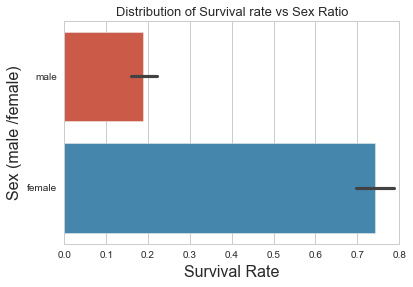

In [12]:
#No. of males 
no_male = titanic_data['Sex'].value_counts()['male']

no_female = titanic_data['Sex'].value_counts()['female']

#Survived/Died Male guys who survived
no_male_survived =  titanic_data.groupby(['Sex' , 'Survived']).size()[3]
no_male_died = no_male - no_male_survived

#Survived/Died Female guys who survived
no_female_survived =  titanic_data.groupby(['Sex' , 'Survived']).size()[1]
no_female_died = no_female - no_female_survived

print('No. of Males : {}  , {:.2f}% of total'.format(no_male, float(no_male*100 )/len(titanic_data)))
print('No. of Male Survived : {} , {:.2f}%'.format(no_male_survived , float(no_male_survived)*100/no_male))
print('No. of Male Died : {}, {:.2f}% '.format( no_male_died, float(no_male_died)*100/no_male ))

print '\n'
print('No. of Females : {}  , {:.2f}% of total'.format(no_female, float(no_female)*100 /len(titanic_data)))
print('No. of Female Survived : {} , {:.2f}%'.format(no_female_survived , float(no_female_survived)*100/no_female))
print('No. of Female Died : {}, {:.2f}% '.format( no_female_died, float(no_female_died)*100/no_female ))


sns.set_style("whitegrid")
sns.barplot(data = titanic_data , x = "Survived" , y ="Sex",capsize=14)
plt.ylabel('Sex (male /female)', fontsize=16)
plt.xlabel('Survival Rate', fontsize=16)
plt.title("Distribution of Survival rate vs Sex Ratio" , fontsize = 13)
sns.plt.show()

The above analysis gives an insight that Females were preferred to be saved i.e, their survival rate was high 

---------------------------------------------------------------------------------------------------

### Q3. Analysis of Survival according to age , i.e, Children | Adults | Senior Citizens

In [13]:
def isAge(x):
    if x < 18.0:
        return "Child" 
    elif x >60.0:
        return "Senior Citizen"
    else:
        return "Adult"

titanic_data["IsChild"] = pd.Series(titanic_data["Age"].apply(isAge), index=titanic_data.index)

No. of Children : 113  , 12.68% of total
No. of Child Survived : 61 , 53.98%
No. of Child Died : 52, 46.02% 


No. of Senior Citizen : 22  , 2.47% of total
No. of Senior Citizen Survived : 5 , 22.73%
No. of Senior Citizen Died : 17, 77.27% 


No. of Adults : 756  , 84.85% of total
No. of Adults Survived : 276 , 36.51%
No. of Adults  Died : 480, 63.49% 


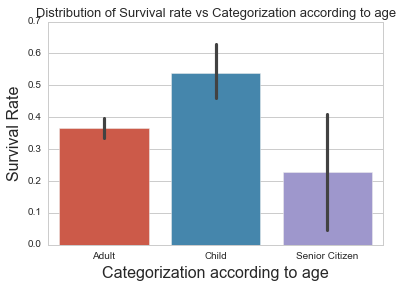

In [14]:
no_Child = titanic_data['IsChild'].value_counts()['Child']
no_SrCz = titanic_data['IsChild'].value_counts()['Senior Citizen']
no_Adult = titanic_data['IsChild'].value_counts()['Adult']

no_Child_survived =  titanic_data.groupby(['IsChild' , 'Survived']).size()['Child'][1]
no_Child_died = no_Child - no_Child_survived

#Survived/Died Female guys who survived
no_SrCz_survived =  titanic_data.groupby(['IsChild' , 'Survived']).size()['Senior Citizen'][1]
no_SrCz_died = no_SrCz - no_SrCz_survived

no_Adult_survived =  titanic_data.groupby(['IsChild' , 'Survived']).size()['Adult'][1]
no_Adult_died = no_Adult - no_Adult_survived


print('No. of Children : {}  , {:.2f}% of total'.format(no_Child, float(no_Child*100 )/len(titanic_data)))
print('No. of Child Survived : {} , {:.2f}%'.format(no_Child_survived , float(no_Child_survived)*100/no_Child))
print('No. of Child Died : {}, {:.2f}% '.format( no_Child_died, float(no_Child_died)*100/no_Child ))

print '\n'

print('No. of Senior Citizen : {}  , {:.2f}% of total'.format(no_SrCz, float(no_SrCz*100 )/len(titanic_data)))
print('No. of Senior Citizen Survived : {} , {:.2f}%'.format(no_SrCz_survived , float(no_SrCz_survived)*100/no_SrCz))
print('No. of Senior Citizen Died : {}, {:.2f}% '.format( no_SrCz_died, float(no_SrCz_died)*100/no_SrCz ))

print '\n'

print('No. of Adults : {}  , {:.2f}% of total'.format(no_Adult, float(no_Adult*100 )/len(titanic_data)))
print('No. of Adults Survived : {} , {:.2f}%'.format(no_Adult_survived , float(no_Adult_survived)*100/no_Adult))
print('No. of Adults  Died : {}, {:.2f}% '.format( no_Adult_died, float(no_Adult_died)*100/no_Adult ))


sns.set_style("whitegrid")
sns.barplot(data = titanic_data , y = "Survived" , x ="IsChild")
plt.ylabel('Survival Rate', fontsize=16)
plt.xlabel('Categorization according to age', fontsize=16)
plt.title("Distribution of Survival rate vs Categorization according to age" , fontsize = 13)
sns.plt.show()

The Above Analysis shows that 

> * **54% of Children** were saved. So, survival of children were **higher than Adults and Senior Citizens.**

> * Survival Rate of ** Adults(36.5%)** is ** higher**  than ** Senior Citizens(22.7%)**



---------------------------------------------------------------------------------------------------

### Q4. Analysis of Survival in  Male Child and Female Child

No. of Female Child : 55  , 6.17% of total
No. of Female Child Survived : 38 , 69.09%
No. of Female Child Died : 17, 30.91% 


No. of Male Child : 58  , 6.51% of total
No. of Male Child Survived : 23 , 39.66%
No. of Male Child Died : 35, 60.34% 




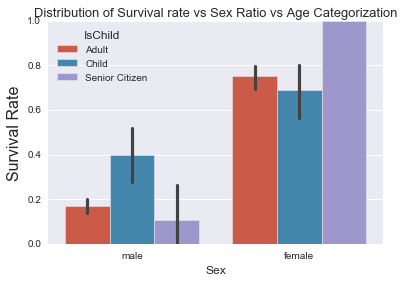

In [15]:
no_Female_Child = titanic_data.groupby(['IsChild' , 'Sex']).size()['Child']['female']
no_male_Child =  titanic_data.groupby(['IsChild' , 'Sex']).size()['Child']['male']

no_CFemale_Survived = titanic_data.groupby(['IsChild' ,'Survived', 'Sex']).size()['Child'][1]['female']
no_CFemale_Died = no_Female_Child - no_CFemale_Survived
no_CMale_Survived = titanic_data.groupby(['IsChild' ,'Survived', 'Sex']).size()['Child'][1]['male']
no_CMale_Died = no_male_Child -no_CMale_Survived


print('No. of Female Child : {}  , {:.2f}% of total'.format(no_Female_Child, float(no_Female_Child*100 )/len(titanic_data)))
print('No. of Female Child Survived : {} , {:.2f}%'.format(no_CFemale_Survived , float(no_CFemale_Survived)*100/no_Female_Child))
print('No. of Female Child Died : {}, {:.2f}% '.format( no_CFemale_Died, float(no_CFemale_Died)*100/no_Female_Child ))

print '\n'

print('No. of Male Child : {}  , {:.2f}% of total'.format(no_male_Child, float(no_male_Child*100 )/len(titanic_data)))
print('No. of Male Child Survived : {} , {:.2f}%'.format(no_CMale_Survived , float(no_CMale_Survived)*100/no_male_Child))
print('No. of Male Child Died : {}, {:.2f}% '.format( no_CMale_Died, float(no_CMale_Died)*100/no_male_Child ))

print '\n'
sns.set_style("darkgrid")
sns.barplot(data = titanic_data , y = "Survived" , x ="Sex"  , hue="IsChild")
plt.ylabel('Survival Rate', fontsize=16)
plt.title("Distribution of Survival rate vs Sex Ratio vs Age Categorization" , fontsize = 13)
sns.plt.show()


It shows that Survival Rate of **Female Children(69%) is more than Male Child(40%)**

---------------------------------------------------------------------------------------------------

### Q5. Analysis of Survival according to Socio-economic status Upper Class (1st), Middle Class(2nd) , Lower Class(3rd)

No. of Class 1 people : 216  , 24.24% of total
No. of Class 1 people Survived : 136 , 62.96%
No. of Class 1 people Died : 80, 37.04% 


No. of Class 2 people : 184  , 20.65% of total
No. of Class 2 people Survived : 87 , 47.28%
No. of Class 2 people Died : 97, 52.72% 


No. of Class 3 people : 491  , 55.11% of total
No. of Class 3 people Survived : 119 , 24.24%
No. of Class 3 people Died : 372, 75.76% 


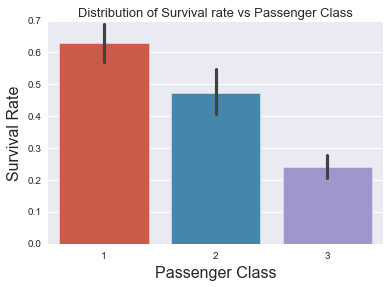

In [16]:
no_class_1 = titanic_data['Pclass'].value_counts()[1]
no_class_2 = titanic_data['Pclass'].value_counts()[2]
no_class_3 = titanic_data['Pclass'].value_counts()[3]

#print titanic_data.groupby(['Pclass' , 'Survived']).size()

no_class_1_survived =  titanic_data.groupby(['Pclass' , 'Survived']).size()[1][1]
no_class_1_died = no_class_1 - no_class_1_survived

no_class_2_survived =  titanic_data.groupby(['Pclass' , 'Survived']).size()[2][1]
no_class_2_died = no_class_2 - no_class_2_survived

no_class_3_survived =  titanic_data.groupby(['Pclass' , 'Survived']).size()[3][1]
no_class_3_died = no_class_3 - no_class_3_survived

print('No. of Class 1 people : {}  , {:.2f}% of total'.format(no_class_1, float(no_class_1*100 )/len(titanic_data)))
print('No. of Class 1 people Survived : {} , {:.2f}%'.format(no_class_1_survived , float(no_class_1_survived)*100/no_class_1))
print('No. of Class 1 people Died : {}, {:.2f}% '.format( no_class_1_died, float(no_class_1_died)*100/no_class_1 ))

print '\n'
print('No. of Class 2 people : {}  , {:.2f}% of total'.format(no_class_2, float(no_class_2)*100 /len(titanic_data)))
print('No. of Class 2 people Survived : {} , {:.2f}%'.format(no_class_2_survived , float(no_class_2_survived)*100/no_class_2))
print('No. of Class 2 people Died : {}, {:.2f}% '.format( no_class_2_died, float(no_class_2_died)*100/no_class_2 ))

print '\n'
print('No. of Class 3 people : {}  , {:.2f}% of total'.format(no_class_3, float(no_class_3)*100 /len(titanic_data)))
print('No. of Class 3 people Survived : {} , {:.2f}%'.format(no_class_3_survived , float(no_class_3_survived)*100/no_class_3))
print('No. of Class 3 people Died : {}, {:.2f}% '.format( no_class_3_died, float(no_class_3_died)*100/no_class_3 ))


sns.set_style("darkgrid")
sns.barplot(data = titanic_data , y = "Survived" , x ="Pclass" )
plt.ylabel('Survival Rate', fontsize=16)
plt.xlabel('Passenger Class', fontsize=16)
plt.title("Distribution of Survival rate vs Passenger Class" , fontsize = 13)
sns.plt.show()



It shows that **Upper Class (63%)** were **preffered** over **Middle Class(47%) & Lower Class(24%)** people.

---------------------------------------------------------------------------------------------------

### Q6. Chances of Survival According to Embarkment Station.

No. of People boarded from Cherbourg : 168  , 18.86% of total
No. of People boarded from Cherbourg  who Survived: 93 , 55.36%
No. of People boarded from Cherbourg  who Died : 75, 44.64% 


No. of People boarded from Queenstown : 77  , 20.65% of total
No. of People boarded from Queenstown  who Survived : 30 , 38.96%
No. of People boarded from Queenstown  who Died : 47, 61.04% 


No. of People boarded from Southampton : 644  , 72.28% of total
No. of People boarded from Southampton  who Survived : 217 , 33.70%
No. of People boarded from Southampton  who Died : 427, 66.30% 


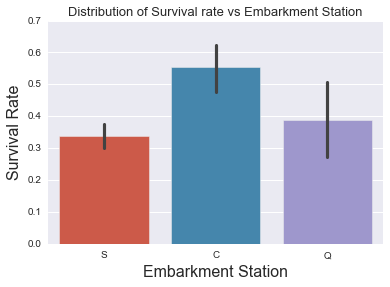

In [17]:
no_boarded_C = titanic_data['Embarked'].value_counts()['C']
no_boarded_Q = titanic_data['Embarked'].value_counts()['Q']
no_boarded_S = titanic_data['Embarked'].value_counts()['S']

#print titanic_data.groupby(['Embarked' , 'Survived']).size()

no_boarded_C_survived =  titanic_data.groupby(['Embarked' , 'Survived']).size()['C'][1]
no_boarded_C_died = no_boarded_C - no_boarded_C_survived

no_boarded_Q_survived =  titanic_data.groupby(['Embarked' , 'Survived']).size()['Q'][1]
no_boarded_Q_died = no_boarded_Q - no_boarded_Q_survived

no_boarded_S_survived =  titanic_data.groupby(['Embarked' , 'Survived']).size()['S'][1]
no_boarded_S_died = no_boarded_S - no_boarded_S_survived

print('No. of People boarded from Cherbourg : {}  , {:.2f}% of total'.format(no_boarded_C, float(no_boarded_C*100 )/len(titanic_data)))
print('No. of People boarded from Cherbourg  who Survived: {} , {:.2f}%'.format(no_boarded_C_survived , float(no_boarded_C_survived)*100/no_boarded_C))
print('No. of People boarded from Cherbourg  who Died : {}, {:.2f}% '.format( no_boarded_C_died, float(no_boarded_C_died)*100/no_boarded_C ))

print '\n'
print('No. of People boarded from Queenstown : {}  , {:.2f}% of total'.format(no_boarded_Q, float(no_class_2)*100 /len(titanic_data)))
print('No. of People boarded from Queenstown  who Survived : {} , {:.2f}%'.format(no_boarded_Q_survived , float(no_boarded_Q_survived)*100/no_boarded_Q))
print('No. of People boarded from Queenstown  who Died : {}, {:.2f}% '.format( no_boarded_Q_died, float(no_boarded_Q_died)*100/no_boarded_Q ))

print '\n'
print('No. of People boarded from Southampton : {}  , {:.2f}% of total'.format(no_boarded_S, float(no_boarded_S)*100 /len(titanic_data)))
print('No. of People boarded from Southampton  who Survived : {} , {:.2f}%'.format(no_boarded_S_survived , float(no_boarded_S_survived)*100/no_boarded_S))
print('No. of People boarded from Southampton  who Died : {}, {:.2f}% '.format( no_boarded_S_died, float(no_boarded_S_died)*100/no_boarded_S ))

sns.set_style("darkgrid")
sns.barplot(data = titanic_data , y = "Survived" , x ="Embarked" )
plt.ylabel('Survival Rate', fontsize=16)
plt.xlabel('Embarkment Station', fontsize=16)
plt.title("Distribution of Survival rate vs Embarkment Station" , fontsize = 13)
sns.plt.show()



It shows that people who boarded from :
   > * **Cherbourg** had higher probablity of survival**(55.36%) **
   > * **Southampton**  had lowest probablity of survival**(33.7%)**
    

-------------------------------------------------------------------------------------------

### Q7. Chances of survival of Man with child(Father) or spouse(Husband) or Single

C:\Users\RAHUL\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


No. of Adult Fathers : 34  , 3.82% of total
No. of Adult Fathers Survived : 6 , 17.65%
No. of Adult Fathers Died : 28, 82.35% 


No. of Adult Husband : 70  , 7.86% of total
No. of Adult Husband Survived : 15 , 21.43%
No. of Adult Husband Died : 55, 78.57% 


No. of Adult Single : 415  , 46.58% of total
No. of Adult Single Survived : 65 , 15.66%
No. of Adult Single Died : 350, 84.34% 




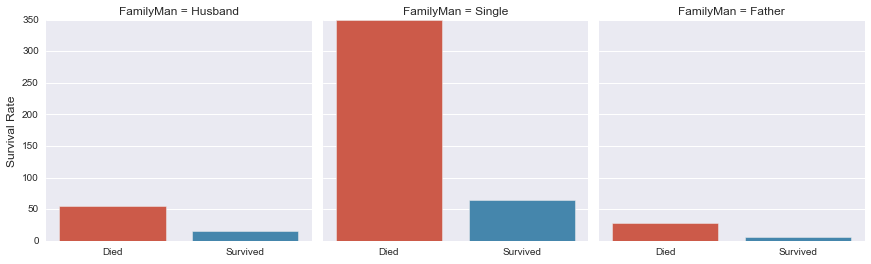

In [18]:
def isAdultMan(x):
    return (x["IsChild"] =="Senior Citizen" or x["IsChild"] =="Adult")  and x["Sex"] == "male"

adult_man_titanic_data = titanic_data[titanic_data.apply(isAdultMan, axis=1)]


def isFamilyMan(x):
    if x["SibSp"] > 0:
        if x["Parch"] > 0:
            return "Father"
        else:
            return "Husband"
    else:
        return "Single"
adult_man_titanic_data["FamilyMan"] = pd.Series(adult_man_titanic_data.apply(isFamilyMan, axis=1), index=adult_man_titanic_data.index)
# print adult_man_titanic_data["FamilyMan"].value_counts()

no_Adult_Fathers_survived =  adult_man_titanic_data.groupby(['FamilyMan' , 'Survived']).size()['Father'][1]
no_Adult_Fathers_died = adult_man_titanic_data.groupby(['FamilyMan' , 'Survived']).size()['Father'][0]

no_Fathers = adult_man_titanic_data["FamilyMan"].value_counts()["Father"]

print('No. of Adult Fathers : {}  , {:.2f}% of total'.format(no_Fathers , float(no_Fathers *100 )/len(titanic_data)))
print('No. of Adult Fathers Survived : {} , {:.2f}%'.format(no_Adult_Fathers_survived , float(no_Adult_Fathers_survived)*100/no_Fathers))
print('No. of Adult Fathers Died : {}, {:.2f}% '.format( no_Adult_Fathers_died, float(no_Adult_Fathers_died)*100/no_Fathers ))

print '\n'

no_Husband_survived =  adult_man_titanic_data.groupby(['FamilyMan' , 'Survived']).size()['Husband'][1]
no_Husband_died = adult_man_titanic_data.groupby(['FamilyMan' , 'Survived']).size()['Husband'][0]


no_Husband = adult_man_titanic_data["FamilyMan"].value_counts()["Husband"]

print('No. of Adult Husband : {}  , {:.2f}% of total'.format(no_Husband , float(no_Husband *100 )/len(titanic_data)))
print('No. of Adult Husband Survived : {} , {:.2f}%'.format(no_Husband_survived , float(no_Husband_survived)*100/no_Husband))
print('No. of Adult Husband Died : {}, {:.2f}% '.format( no_Husband_died, float(no_Husband_died)*100/no_Husband ))

print '\n'

no_Single_survived =  adult_man_titanic_data.groupby(['FamilyMan' , 'Survived']).size()['Single'][1]
no_Single_died = adult_man_titanic_data.groupby(['FamilyMan' , 'Survived']).size()['Single'][0]

no_Single = adult_man_titanic_data["FamilyMan"].value_counts()["Single"]

print('No. of Adult Single : {}  , {:.2f}% of total'.format(no_Single , float(no_Single *100 )/len(titanic_data)))
print('No. of Adult Single Survived : {} , {:.2f}%'.format(no_Single_survived , float(no_Single_survived)*100/no_Single))
print('No. of Adult Single Died : {}, {:.2f}% '.format( no_Single_died, float(no_Single_died)*100/no_Single ))

print '\n'



sns.set_style("darkgrid")
g= sns.factorplot(data=adult_man_titanic_data,x="Survived", col="FamilyMan", kind="count" )
g.set_axis_labels("", "Survival Rate").set_xticklabels(["Died", "Survived"])
sns.plt.show()

It shows that Suvival rate of Man travelling with their Wife is Higher that Man travelling with their kids

----------------

### Q8. Best Age-group which had highest probablity of survival

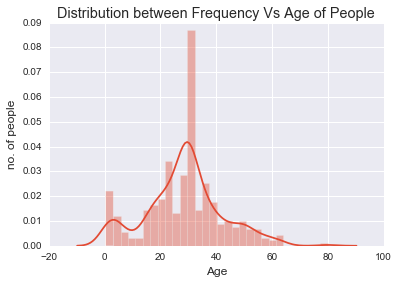

In [19]:
Best_Age = titanic_data[titanic_data['Survived']==1]['Age']
ax = sns.distplot(Best_Age,bins=30)
ax.set(xlabel='Age', ylabel='no. of people',title="Distribution between Frequency Vs Age of People")
sns.plt.show()

It shows that **(29 - 32) age group** people survived more

------------------------------------

## Conclusions :
    
From the above analysis , we are able to understand 2 points:
>  Women first

>  Children first
     
But this is analysis and this conclusion can be true or false. Using two-proportion z-test we can check the difference between two proportion. We saw that survival rate was higher in female than in male and also the same in children.
   
Lets conduct a hypothesis test to see if there is a significant difference between proportions. 
Lets start with male and female:
                              $$H0:Pmale−Pfemale=0$$
                              $$HA:Pmale−Pfemale≠0$$
    
    
To be able to perform the test, these four counditions need to be met:
> * The sampling method for each population is simple random sampling.
> * The samples are independent.
> * Each sample includes at least 10 successes and 10 failures.
> * Each population is at least 20 times as big as its sample.

Here except population to be 20 times of sample all the conditions are true. But, let's consider it to be true because we are not sure about population.

Lets take $$α = 0.05$$
    
Pooled sample proportion:
    $$p=(pmale∗nmale+pfemale∗nfemale)/(nmale+nfemale)$$
 
Standard error:
    $$SE=\sqrt{(p∗(1−p)∗((1/nmale)+(1/nfemale))}$$
 
Test statistic:
    $$z=(pmale−pfemale)/SE$$

In [20]:
import math
from math import sqrt
pmale = float(no_male_survived)/no_male;
pfemale = float(no_female_survived)/no_female;
p = (pmale * no_male + pfemale * no_female) / len(titanic_data)
print "p :", p
x= float(1)/no_male + float(1)/no_female
y = p * ( 1 - p ) * (  x)

SE = math.sqrt(y)
print "SE : ", SE
z = (pmale - pfemale) / SE
print "z :", z

p : 0.383838383838
SE :  0.0341041824181
z : -16.2188339307


On this z-score , P-value will be very small. So we consider rejecting null hypothesis & say that there is a significant difference between proportions

Now Lets check Child/Adult case:


In [21]:
pchild = float(no_Child_survived)/no_Child
# Considering all 18+ people as adult
padult = float(no_Adult_survived+no_SrCz_survived)/(no_SrCz+no_Adult)
p = (pchild * no_Child + padult * (no_SrCz+no_Adult)) / len(titanic_data)
print "p :", p
SE = math.sqrt(p * ( 1 - p ) * ( float(1)/no_Child + float(1)/(no_SrCz+no_Adult) ))
print "SE : ", SE
z = (pchild - padult) / SE
print "z :", z

p : 0.383838383838
SE :  0.0489588663386
z : 3.64878729695


For z= 3.6487 , P value is  0.000264 which is very less as compared to 0.05. The difference between proportions is quite high. 
So, we consider rejecting Null hypothesis.


Similarly we can do this same test with many other answers (all where proportions are compared).
The main conclusion about the questions is that the data set is not a good sample to perform some analysis and made conclusions about the population.

### References 

The list of sources used to complete this investigation is:
> * Titanic dataset (Data Analyst Nanodegree Project 2)
> * Video lectures udacity 
> * Pandas documentation [link](http://pandas.pydata.org/pandas-docs/stable/#)
> * Numpy Documentation [link](http://docs.scipy.org/doc/numpy/reference/)
> * Seaborn statistical data visualization reference page [link](http://stanford.edu/~mwaskom/software/seaborn/)
> * Tutorials [pandas](www.gregreda.com/2013/10/26/working-with-pandas-dataframes/) , [latex](http://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook)
> * nbconvert for conversion of ipynb to html [link](https://github.com/jupyter/nbconvert)